In [6]:
import numpy as np
X = 2*np.random.rand(100, 1)
y = 4 + 3*X + np.random.randn(100, 1)

<function matplotlib.pyplot.show(close=None, block=None)>

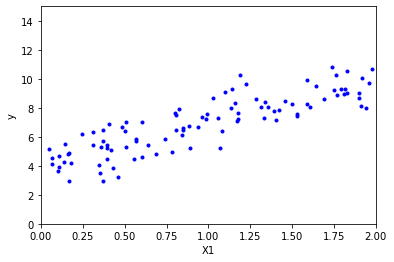

In [12]:
import matplotlib.pyplot as plt
# plt.scatter(X, y)
plt.plot(X, y, 'b.')
plt.xlabel("X1")
plt.ylabel("y")
plt.axis([0, 2, 0, 15])
plt.show

In [26]:
# 先加一列偏置项
X_bias = np.hstack((np.ones((100, 1)), X))

# 根据公式求解。注意，矩阵的逆并不是总是存在的
theta = np.linalg.inv(X_bias.T.dot(X_bias)).dot(X_bias.T).dot(y)
theta

array([[4.12724965],
       [2.90096625]])

<function matplotlib.pyplot.show(close=None, block=None)>

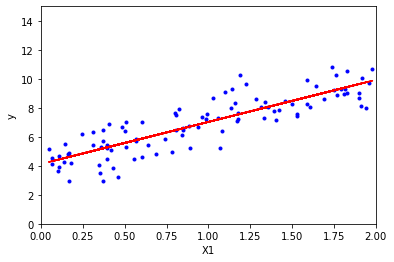

In [32]:
y_predict = theta[0] + theta[1]*X
plt.plot(X, y, 'b.')
plt.plot(X, y_predict, 'r')
plt.xlabel("X1")
plt.ylabel("y")
plt.axis([0, 2, 0, 15])
plt.show

# 上述公式求解参数并不能反映机器学习思想，且矩阵的逆并不总是存在

In [36]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X, y)
print(linear_reg.coef_, linear_reg.intercept_)

[[2.90096625]] [4.12724965]


## 梯度下降
### 问题
* 步长太小，训练时间长；
* 步长太大，震荡，效果不好；
* 随机选取初值点的位置；
* 不使用标准化会导致收敛速度慢；
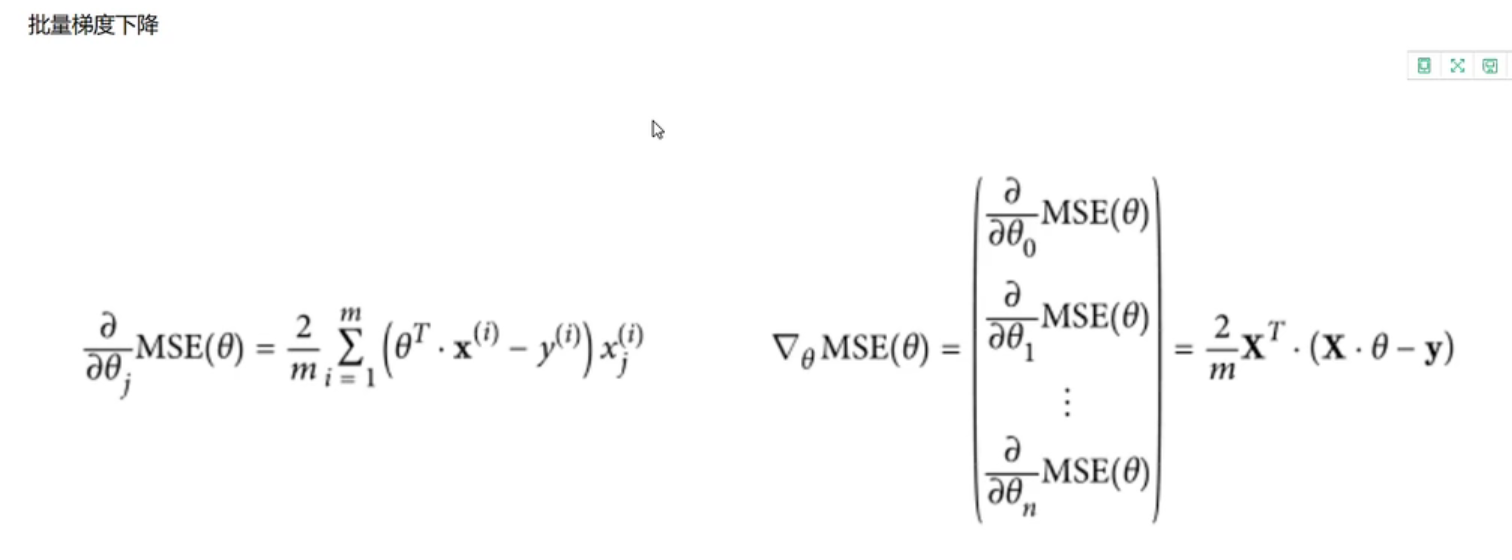

## 批量梯度下降

In [40]:
learnin_rate = 0.1
iterations = 1000
m = 100
theta = np.random.randn(2, 1)
for it in range(iterations):
    gradients = 2/m*X_bias.T.dot(X_bias.dot(theta)-y)
    theta = theta - learnin_rate*gradients
theta

array([[4.12724965],
       [2.90096625]])

In [48]:
np.array([[1, 0], [1, 2]]).dot(theta)

array([[4.12724965],
       [9.92918214]])

## 不同学习率的影响

In [117]:
theta_path_bgd = []
def plot_gradient_descent(theta, learning_rate, theta_path = None):
    m = len(X_bias)
    plt.plot(X, y, 'b.')
    iterations = 1000
    for it in range(iterations):
        y_predict = np.array([[1, 0], [1, 2]]).dot(theta)
        plt.plot(np.array([[0], [2]]), y_predict, 'r')
        gradients = 2/m*X_bias.T.dot(X_bias.dot(theta)-y)
        theta = theta - learning_rate*gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("X_1")
    plt.axis([0, 2, 0, 15])
    plt.title("learning rate = {}".format(learning_rate))

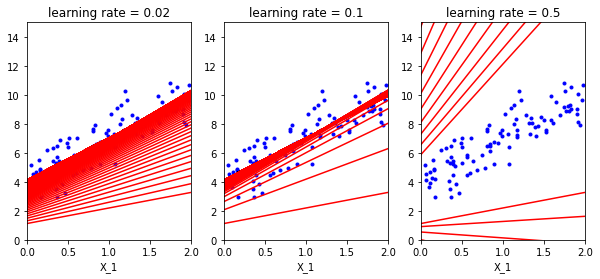

In [118]:
theta = np.random.randn(2, 1)
plt.figure(figsize=(10, 4))
plt.subplot(131)
plot_gradient_descent(theta, learning_rate=0.02)
plt.subplot(132)
plot_gradient_descent(theta, learning_rate=0.1, theta_path=theta_path_bgd)
plt.subplot(133)
plot_gradient_descent(theta, learning_rate=0.5)

## 随机梯度下降

<function matplotlib.pyplot.show(close=None, block=None)>

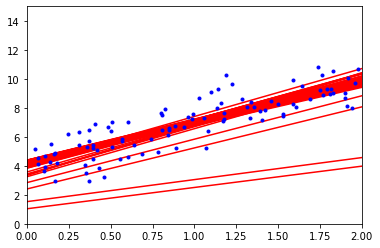

In [91]:
theta_path_sgd = []
m = len(X_bias)
n_epochs = 50

t0 = 5
t1 = 50

def lr_schedule(t):
    return t0 / (t1 + t)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        if epoch < 10 and i < 10:
            y_predict = np.array([[1, 0], [1, 2]]).dot(theta)
            plt.plot(np.array([[0], [2]]), y_predict, 'r')
        random_index = np.random.randint(m)
        xi = X_bias[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2*xi.T.dot(xi.dot(theta)-yi)
        lr = lr_schedule(epoch*m + i)
        theta = theta - lr*gradients
        theta_path_sgd.append(theta)
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show

## minibatch梯度下降

In [100]:
theta_path_mgd = []
n_iterations = 50
minibatch = 16
n_epochs = 50

theta = np.random.randn(2, 1)
t = 0
for epoch in range(n_epochs):
    shuffled_index = np.random.permutation(m)
    shuffled_X = X_bias[shuffled_index]
    shuffled_y = y[shuffled_index]
    for i in range(0, m, minibatch):
        t+=1
        xi = shuffled_X[i:i+minibatch]
        yi = shuffled_y[i:i+minibatch]
        gradients =  2/minibatch*xi.T.dot(xi.dot(theta)-yi)
        lr = lr_schedule(t)
        theta = theta - lr*gradients
        theta_path_mgd.append(theta)
theta

array([[4.10934983],
       [2.91261411]])

## 三种策略对比实验

In [122]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

<function matplotlib.pyplot.show(close=None, block=None)>

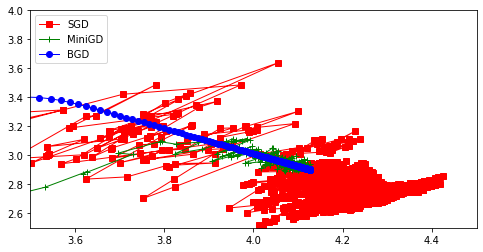

In [130]:
plt.figure(figsize=(8, 4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], 'r-s', linewidth=1, label="SGD")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], 'g-+', linewidth=1, label="MiniGD")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], 'b-o', linewidth=1, label="BGD")
plt.legend(loc="upper left")
plt.axis([3.5, 4.5, 2.5, 4.0])
plt.show